<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/G2_Charli_0000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
import pandas as pd

# ======================
# 1. Configuración
# ======================
API_KEY = "RGAPI-6b207b8d-f5fc-4fc0-89ac-4696a0db499c"
riot_name = "G2 Charli"
riot_tag = "0000"

# ======================
# 2. PUUID del jugador
# ======================
url_account = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{riot_name}/{riot_tag}?api_key={API_KEY}"
resp = requests.get(url_account).json()

puuid = resp["puuid"]
print("PUUID:", puuid)

# ======================
# 3. IDs de partidas recientes
# ======================
url_matches = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=30&api_key={API_KEY}"
matches = requests.get(url_matches).json()

print("Número de partidas obtenidas:", len(matches))

# ======================
# 4. Estadísticas de cada partida
# ======================
data = []

for match_id in matches:
    url_match = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
    match_data = requests.get(url_match).json()

    # Buscar al jugador en la partida
    for player in match_data["info"]["participants"]:
        if player["puuid"] == puuid:
            stats = {
                "Partida": match_id,
                "Campeón": player["championName"],
                "Kills": player["kills"],
                "Deaths": player["deaths"],
                "Assists": player["assists"],
                "KDA": round((player["kills"] + player["assists"]) / (player["deaths"] if player["deaths"] > 0 else 1), 2),
                "CS": player["totalMinionsKilled"] + player.get("neutralMinionsKilled", 0),
                "Vision Score": player["visionScore"],
                "Daño infligido": player["totalDamageDealtToChampions"],
                "Daño recibido": player["totalDamageTaken"],
                "Resultado": "Victoria" if player["win"] else "Derrota"
            }
            data.append(stats)

# ======================
# 5. Convertir a DataFrame y mostrar
# ======================
df = pd.DataFrame(data)
print(df)

# ======================
# 6. Resumen general
# ======================
avg_kda = round(df["KDA"].mean(), 2)
avg_cs = round(df["CS"].mean(), 2)
avg_vision = round(df["Vision Score"].mean(), 2)
most_played = df["Campeón"].value_counts().index[0]

print("\n=== RESUMEN GENERAL ===")
print("Promedio de KDA:", avg_kda)
print("Promedio de CS:", avg_cs)
print("Promedio de visión:", avg_vision)
print("Campeón más jugado:", most_played)

# ======================
# 7. Generar informe automático
# ======================
print("\n=== INFORME DE MEJORA ===")

# KDA
if avg_kda < 2:
    print("- Tu KDA es bajo, mueres demasiado. Debes trabajar en posicionamiento y saber cuándo retirarte.")
elif avg_kda < 4:
    print("- Tu KDA es decente, pero aún puedes mejorar. Trata de morir menos y aprovechar mejor las peleas.")
else:
    print("- Muy buen KDA, manejas bien las peleas y el riesgo.")

# CS
if avg_cs < 100:
    print("- Farmeas poco. Practica last hit en partidas normales, apúntale a 7-8 cs/min en línea.")
elif avg_cs < 150:
    print("- Tu farm es aceptable, pero aún puedes mejorar el control de oleadas.")
else:
    print("- Muy buen farm, aprovechas bien los recursos.")

# Visión
if avg_vision < 20:
    print("- Colocas poca visión. Usa más wards y controla zonas clave del mapa.")
elif avg_vision < 40:
    print("- Tu visión es aceptable, pero aún puedes mejorar el control de mapa.")
else:
    print("- Muy buen uso de visión, ayudas al equipo a jugar seguro.")

# Campeón más jugado
print(f"- Tu campeón más jugado es **{most_played}**. Especialízate en dominarlo aún más o arma un pool de 2-3 campeones similares.")


PUUID: 5T5dkYdiy51LLVwblPSkCWkXCfYInrDb5jZGZ9JQV9aqcgxJudoA3RI8Ze1twAGqp6Og3motsFpNVA
Número de partidas obtenidas: 30
           Partida   Campeón  Kills  Deaths  Assists    KDA   CS  \
0   LA1_1652083237     Fiora     12       6        4   2.67  195   
1   LA1_1652062815     Kayle      9      13        6   1.15  208   
2   LA1_1651790760       Jax      1       7        4   0.71  118   
3   LA1_1651783595    Veigar      1       9        2   0.33   75   
4   LA1_1651697475  Nocturne     12       0        3  15.00  263   
5   LA1_1651678115     Senna      9      15       25   2.27   40   
6   LA1_1650643436    Veigar     16       4        4   5.00  262   
7   LA1_1650630756    Veigar      9       7        8   2.43  235   
8   LA1_1650395768    Veigar      0       7        1   0.14  246   
9   LA1_1650285851        Vi     10       8        6   2.00  243   
10  LA1_1650278368   Evelynn     13       4       14   6.75  239   
11  LA1_1650147800    Veigar      8       9        6   1.56  241 

In [ ]:
from collections import defaultdict

champion_stats = defaultdict(lambda: {"wins": 0, "games": 0})

for match_id in matches:  # matches = lista de partidas que ya tienes
    url_match = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
    match_data = requests.get(url_match).json()

    for player in match_data["info"]["participants"]:
        if player["puuid"] == puuid:
            champ = player["championName"]
            win = player["win"]

            champion_stats[champ]["games"] += 1
            if win:
                champion_stats[champ]["wins"] += 1


In [ ]:
# Ordenar por cantidad de victorias
most_wins = sorted(champion_stats.items(), key=lambda x: x[1]["wins"], reverse=True)

print("=== Campeones con más victorias ===")
for champ, stats in most_wins[:18]:  # top 18 campeones
    winrate = (stats["wins"] / stats["games"]) * 100 if stats["games"] > 0 else 0
    print(f"{champ}: {stats['wins']} victorias en {stats['games']} partidas (Winrate: {winrate:.1f}%)")


=== Campeones con más victorias ===
Veigar: 5 victorias en 11 partidas (Winrate: 45.5%)
Jax: 1 victorias en 1 partidas (Winrate: 100.0%)
Nocturne: 1 victorias en 1 partidas (Winrate: 100.0%)
Senna: 1 victorias en 1 partidas (Winrate: 100.0%)
Vi: 1 victorias en 1 partidas (Winrate: 100.0%)
Evelynn: 1 victorias en 1 partidas (Winrate: 100.0%)
Soraka: 1 victorias en 1 partidas (Winrate: 100.0%)
Kayle: 1 victorias en 1 partidas (Winrate: 100.0%)
Maokai: 1 victorias en 1 partidas (Winrate: 100.0%)
Kennen: 1 victorias en 1 partidas (Winrate: 100.0%)
Ziggs: 1 victorias en 1 partidas (Winrate: 100.0%)
Kaisa: 1 victorias en 1 partidas (Winrate: 100.0%)
Fiora: 1 victorias en 2 partidas (Winrate: 50.0%)
Nautilus: 1 victorias en 2 partidas (Winrate: 50.0%)
Fizz: 0 victorias en 1 partidas (Winrate: 0.0%)
Thresh: 0 victorias en 1 partidas (Winrate: 0.0%)
Warwick: 0 victorias en 1 partidas (Winrate: 0.0%)
Xerath: 0 victorias en 1 partidas (Winrate: 0.0%)


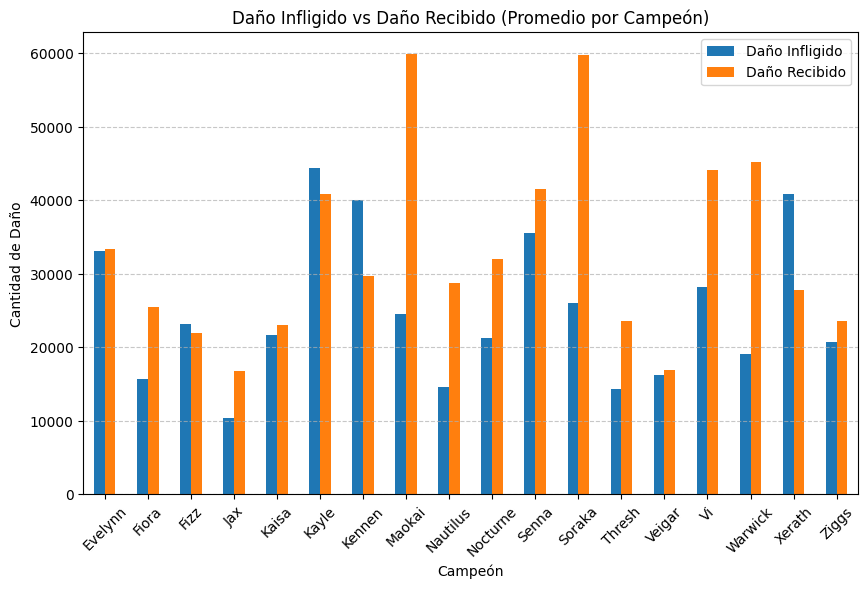

In [ ]:
import matplotlib.pyplot as plt

# ==========================
# Promedio de daño infligido y recibido por campeón
# ==========================
resumen_dano = df.groupby("Campeón")[["Daño infligido", "Daño recibido"]].mean()

# ==========================
# Gráfico de barras
# ==========================
resumen_dano.plot(kind="bar", figsize=(10,6))

plt.title("Daño Infligido vs Daño Recibido (Promedio por Campeón)")
plt.ylabel("Cantidad de Daño")
plt.xlabel("Campeón")
plt.xticks(rotation=45)
plt.legend(["Daño Infligido", "Daño Recibido"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


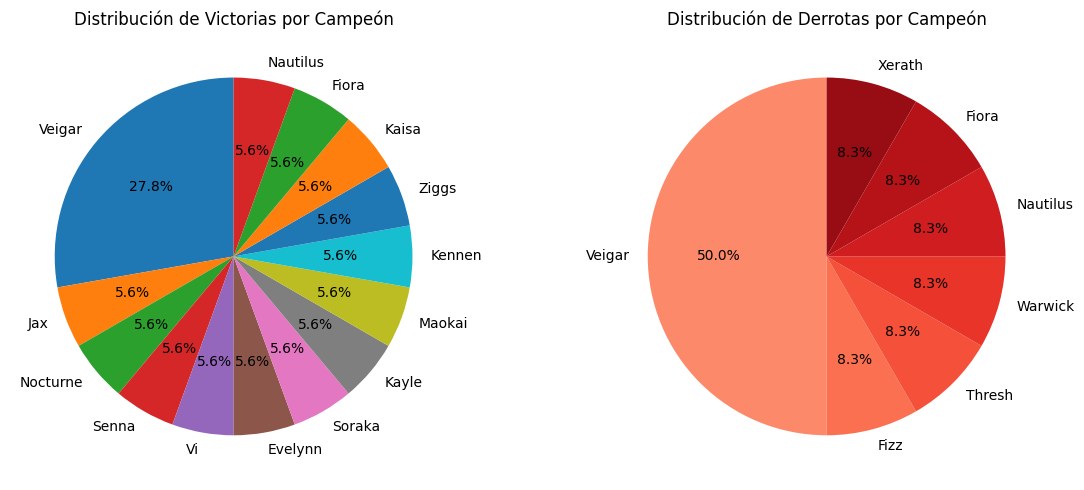

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================
# Contar victorias y derrotas por campeón
# ==========================
victorias = df[df["Resultado"] == "Victoria"]["Campeón"].value_counts()
derrotas = df[df["Resultado"] == "Derrota"]["Campeón"].value_counts()

# ==========================
# Generar colores desde la colormap Reds
# ==========================
colores_derrotas = plt.cm.Reds(np.linspace(0.4, 0.9, len(derrotas)))

# ==========================
# Gráfico de torta - Victorias
# ==========================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.pie(victorias, labels=victorias.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Victorias por Campeón")

# ==========================
# Gráfico de torta - Derrotas
# ==========================
plt.subplot(1,2,2)
plt.pie(derrotas, labels=derrotas.index, autopct="%1.1f%%", startangle=90, colors=colores_derrotas)
plt.title("Distribución de Derrotas por Campeón")

plt.tight_layout()
plt.show()


In [5]:
print(df.columns)

Index(['Partida', 'Campeón', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       'Vision Score', 'Daño infligido', 'Daño recibido', 'Resultado'],
      dtype='object')


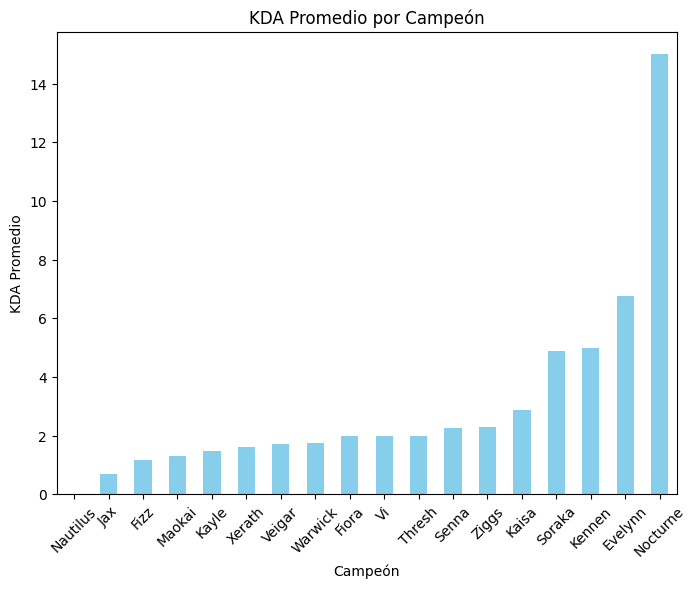

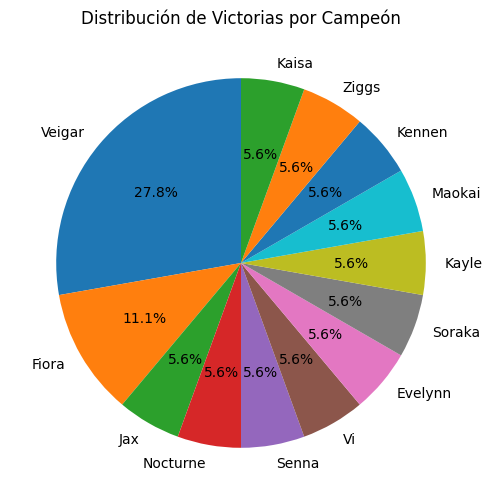

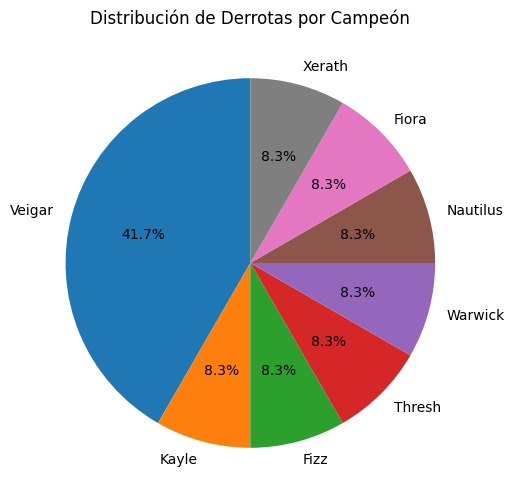

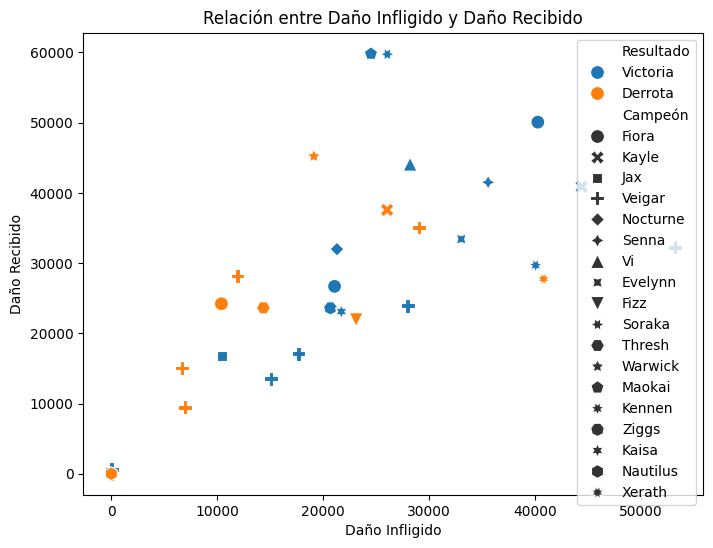

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# 1. Gráfico de Barras - KDA promedio por campeón
# ======================
plt.figure(figsize=(8,6))
df.groupby("Campeón")["KDA"].mean().sort_values().plot(kind="bar", color="skyblue")
plt.title("KDA Promedio por Campeón")
plt.ylabel("KDA Promedio")
plt.xlabel("Campeón")
plt.xticks(rotation=45)
plt.show()

# ======================
# 2. Gráfico de Torta - Distribución de Victorias
# ======================
victorias = df[df["Resultado"]=="Victoria"]["Campeón"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(victorias, labels=victorias.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Victorias por Campeón")
plt.show()

# ======================
# 3. Gráfico de Torta - Distribución de Derrotas
# ======================
derrotas = df[df["Resultado"]=="Derrota"]["Campeón"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(derrotas, labels=derrotas.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Derrotas por Campeón")
plt.show()

# ======================
# 4. Scatterplot - Relación entre Daño infligido y Daño recibido
# ======================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Daño infligido",
    y="Daño recibido",
    hue="Resultado",
    style="Campeón",
    s=100
)
plt.title("Relación entre Daño Infligido y Daño Recibido")
plt.xlabel("Daño Infligido")
plt.ylabel("Daño Recibido")
plt.show()


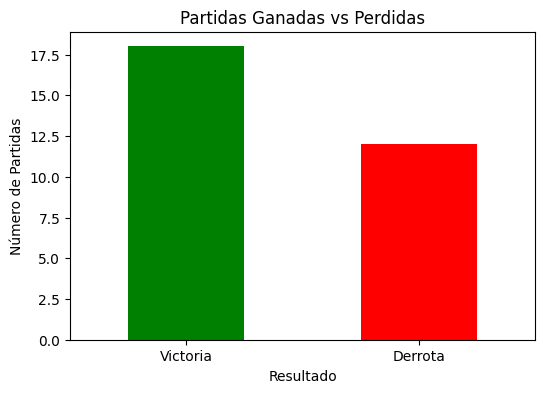

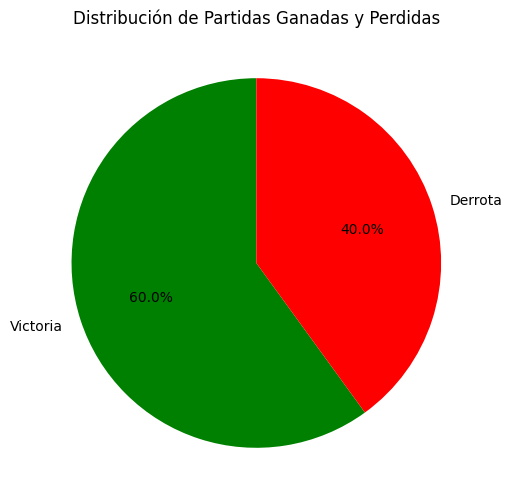

In [8]:
import matplotlib.pyplot as plt

# ======================
# Conteo de resultados
# ======================
resultados = df["Resultado"].value_counts()

# ======================
# 1. Gráfico de Barras
# ======================
plt.figure(figsize=(6,4))
resultados.plot(kind="bar", color=["green","red"])
plt.title("Partidas Ganadas vs Perdidas")
plt.ylabel("Número de Partidas")
plt.xlabel("Resultado")
plt.xticks(rotation=0)
plt.show()

# ======================
# 2. Gráfico de Torta
# ======================
plt.figure(figsize=(6,6))
plt.pie(resultados, labels=resultados.index, autopct="%1.1f%%", colors=["green","red"], startangle=90)
plt.title("Distribución de Partidas Ganadas y Perdidas")
plt.show()


In [11]:
# Ordenar por cantidad de victorias
most_wins = sorted(champion_stats.items(), key=lambda x: x[1]["wins"], reverse=True)

print("=== Campeones con más victorias ===")
for champ, stats in most_wins[:17]:  # top 18 campeones
    winrate = (stats["wins"] / stats["games"]) * 100 if stats["games"] > 0 else 0
    print(f"{champ}: {stats['wins']} victorias en {stats['games']} partidas (Winrate: {winrate:.1f}%)")

NameError: name 'champion_stats' is not defined

             KDA          CS  Vision Score
Campeón                                   
Evelynn    6.750  239.000000     32.000000
Fiora      1.990  133.666667     14.666667
Fizz       1.170  132.000000      8.000000
Jax        0.710  118.000000     11.000000
Kaisa      2.880  103.000000     26.000000
Kayle      1.485  232.000000     24.000000
Kennen     5.000  117.000000     17.000000
Maokai     1.310  100.000000      8.000000
Nautilus   0.000    0.000000      0.000000
Nocturne  15.000  263.000000     20.000000
Senna      2.270   40.000000     47.000000
Soraka     4.890   32.000000     39.000000
Thresh     2.000   20.000000     38.000000
Veigar     1.713  158.900000     12.500000
Vi         2.000  243.000000     34.000000
Warwick    1.750  193.000000     16.000000
Xerath     1.600  142.000000     32.000000
Ziggs      2.290  126.000000     21.000000


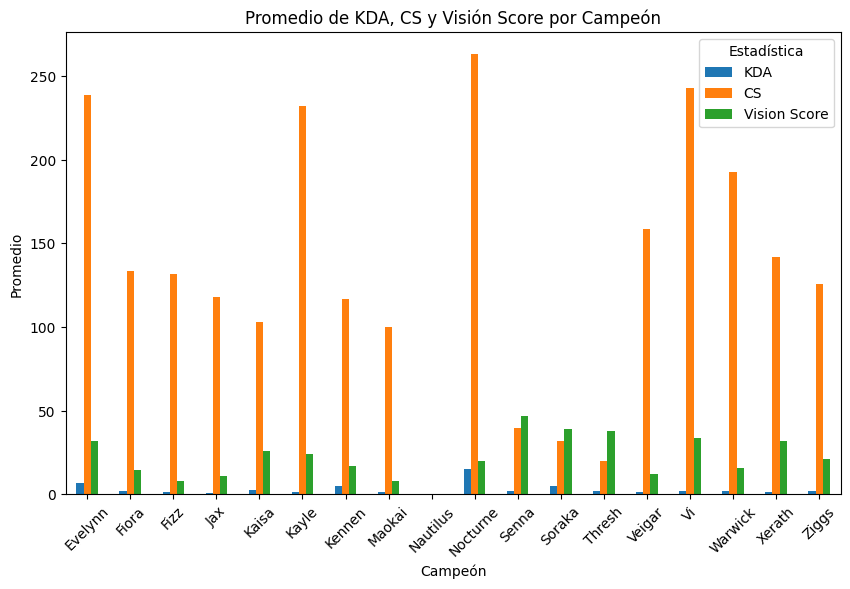

In [12]:
# ======================
# Promedio de estadísticas por campeón
# ======================

promedios = df.groupby("Campeón")[["KDA", "CS", "Vision Score"]].mean()

print(promedios)

# ======================
# Gráfico de barras para visualizar
# ======================
promedios.plot(kind="bar", figsize=(10,6))
plt.title("Promedio de KDA, CS y Visión Score por Campeón")
plt.ylabel("Promedio")
plt.xlabel("Campeón")
plt.xticks(rotation=45)
plt.legend(title="Estadística")
plt.show()
